In [4]:
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn.cluster import KMeans
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D

# read normalized data
my_data = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_2cut2mv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_2cut2mv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_2cut2mv.csv', delimiter=',')
# make data (userid, time(minute), mean, sdnn, ratioLFHF)
#print ('my data: {0}'.format(my_data[0,:]))
#print ('my data: {0}'.format(my_data_2[0,:]))
#print ('my data: {0}'.format(my_data_3[0,:]))
print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))

row_c = my_data.shape[0]
col_c = my_data.shape[1]
n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]


n_clusters = 10
kmeans = KMeans(n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e4, 
                precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1).fit(X[:][:])

print('{0}'.format(n_clusters))
print('kmeans labels:({0})\n{1}'.format(kmeans.labels_.shape, kmeans.labels_))
print('kmeans centers:{0}'.format(kmeans.cluster_centers_))
print('kmeans intertia_:{0}'.format(kmeans.inertia_))

#Draw Picture for the clustered data Set
estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 792
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDNN')
ax.set_zlabel('LF/HF')

ax.scatter(xs, ys, zs, c=kmeans.labels_, cmap='viridis')
#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(kmeans.labels_.shape[0]):
      if(kmeans.labels_[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file0.close()
      if(kmeans.labels_[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file1.close()
      if(kmeans.labels_[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file2.close()
      if(kmeans.labels_[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file3.close()
      if(kmeans.labels_[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file4.close()
      if(kmeans.labels_[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file5.close()
      if(kmeans.labels_[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file6.close()
      if(kmeans.labels_[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file7.close()
      if(kmeans.labels_[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file8.close()
      if(kmeans.labels_[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file9.close()
      if(kmeans.labels_[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*2
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}m\n'.format(userinfo, c_minute))
         file10.close()        

OSError: ./ECGdata/total_user_whitenedmeanPerM_2cut2mv.csv not found.

In [7]:
import csv
import numpy as np

filepath = './ECGStatistics/RPeak.csv'

matrix = []
linecnt = 0
with open(filepath) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if(linecnt == 0):
            matrix = np.append([matrix],[row])
        else:
            matrix = np.vstack([matrix], [row])
    linecnt = linecnt +1       

print(matrix)

['[0.0' ' 0.0' ' 0.003289473684210526' ' 0.03179824561403509'
 ' 0.044956140350877194' ' 0.09210526315789473' ' 0.19298245614035087'
 ' 0.2324561403508772' ' 0.24013157894736842' ' 0.16228070175438597]'
 '[0.0' ' 0.0' ' 0.006379585326953748' ' 0.02711323763955343'
 ' 0.05741626794258373' ' 0.10685805422647528' ' 0.18660287081339713'
 ' 0.22009569377990432' ' 0.22328548644338117' ' 0.1722488038277512]'
 '[0.01092896174863388' ' 0.004098360655737705' ' 0.03961748633879782'
 ' 0.09972677595628415' ' 0.12704918032786885' ' 0.13114754098360656'
 ' 0.14617486338797814' ' 0.17349726775956284' ' 0.1407103825136612'
 ' 0.12704918032786885]' '[0.004524886877828055' ' 0.0'
 ' 0.02262443438914027' ' 0.03167420814479638' ' 0.042986425339366516'
 ' 0.10407239819004525' ' 0.15384615384615385' ' 0.2669683257918552'
 ' 0.17194570135746606' ' 0.20135746606334842]' '[0.0034285714285714284'
 ' 0.022857142857142857' ' 0.03542857142857143' ' 0.09142857142857143'
 ' 0.15771428571428572' ' 0.14285714285714285

In [3]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=8, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    #ax.set_xlabel('Petal width')
    #ax.set_ylabel('Sepal length')
    #ax.set_zlabel('Petal length')
    ax.set_xlabel('심전도 건강')
    ax.set_ylabel('졸음운전 빈도')
    ax.set_zlabel('수면 습관')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

#for name, label in [('Setosa', 0),
#                    ('Versicolour', 1),
#                    ('Virginica', 2)]:
for name, label in [('danger in drowsiness', 0), #졸음운전위험
                    (' ', 1),
                    ('heart attack', 2)]: #심장건강위험
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
#ax.set_xlabel('Petal width')
#ax.set_ylabel('Sepal length')
#ax.set_zlabel('Petal length')
ax.set_xlabel('ECG Health') #심전도 건강
ax.set_ylabel('Sleepness heath') #  수면 건강
ax.set_zlabel('ratio of drowsy driving') #졸음운전 빈도
plt.show()

ImportError: No module named 'sklearn'

In [ ]:
from sklearn.cluster import KMeans
from numpy import genfromtxt
import decimal as dcm
import math


my_data = genfromtxt('./TB_AB300.csv', delimiter=',')
            #0.목둘레, 1.윗가슴둘레, 2.가슴둘레, 3.허리둘레, 4.배꼽수준허리둘레, 5.배둘레, 6.엉덩이둘레, 7.넙다리중간둘레, 8.장딴지둘레,
            #9.위팔둘레, 10.아래팔둘레, 11.어깨가쪽사이길이, 12.화장, 13. 소매팔길이, 14. 등길이, 15.다리가쪽길이, 16.신장, 17.안기장,
            #18.어깨기울기(좌), 19.어꺠기울기(우), 20.총장, 21. 체중
print(my_data.shape)

          
(row,column)=my_data.shape
n_training = math.floor(row * 0.8)
n_testing = row - n_training;
print('n_train:{0},n_test:{1}'.format(n_training, n_testing))
print(my_data)

#목둘레
low_value = 27
v_neck_around = my_data[1:,0]
v_neck_around_int = v_neck_around.astype(int)
min_v_neck = min(v_neck_around_int)  #in current dataset, min value is 29, however we set the minimum value as 27
print(v_neck_around_int)
print(min_v_neck)
Y_Class = v_neck_around_int-low_value

X_train = my_data[1:n_training,[0,2,4,21]] #0.목둘레, 2.가슴둘레, 4.배꼽기준허리둘레, 21.체중
X_test  = my_data[n_training+1:,[0,2,4,21]]
Y_test = Y_Class[n_training:]+low_value 

#ints = [1,2,3,5,7,10,15,20,30,50,100,200,300,500,1000]
#for idx, number in enumerate(ints):
n_clusters = 300
kmeans = KMeans(n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e4, 
                precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1).fit(my_data[1:,[0,2,4,21]])

print('{0}'.format(n_clusters))
print('kmeans labels:({0}){1}'.format(kmeans.labels_.shape, kmeans.labels_))
print('kmeans centers:{0}'.format(kmeans.cluster_centers_))
print('kmeans intertia_:{0}'.format(kmeans.inertia_))

print('n_testing : {0}'.format(X_test))
print('n_testing[0]:{0}, predict:{1}'.format(X_test[0],kmeans.predict(X_test[0])))

prediction = 0.0
n_test_samples = len(X_test)
n_samples = len(my_data)

for n in range(0,n_test_samples):
    predicted_label = kmeans.predict(X_test[n])
    print('predicted_label:{0}'.format(predicted_label))
    #같은 label을 지닌 목둘레값 평균을 통한 목둘레 예측하기
    avg = .0
    cnt = 0
    
    for n_sample in range(0,n_samples-1):
        if(kmeans.labels_[n_sample]==predicted_label):
            avg += my_data[n_sample,0]
            cnt += 1
    if(cnt>=1):
        avg /= cnt       

    #print('cnt:{0}, predicted_value:{1}, original_value:{2}'.format(cnt, avg, Y_test[n]))
    if(abs(round(avg)-Y_test[n])<=2.54):
        prediction += 1.0

prediction /= n_test_samples
print ('Score for test data from 27 to 50 of neck circum.: {0}'.format(prediction))

In [62]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
    

papayawhip #FFEFD5
peachpuff #FFDAB9
firebrick #B22222
royalblue #4169E1
mintcream #F5FFFA
teal #008080
chocolate #D2691E
darkslategrey #2F4F4F
lightblue #ADD8E6
blue #0000FF
linen #FAF0E6
mediumturquoise #48D1CC
mediumpurple #9370DB
yellow #FFFF00
darkmagenta #8B008B
gainsboro #DCDCDC
pink #FFC0CB
violet #EE82EE
ivory #FFFFF0
darkgrey #A9A9A9
deeppink #FF1493
darkgreen #006400
slategray #708090
orange #FFA500
red #FF0000
cyan #00FFFF
yellowgreen #9ACD32
lightgray #D3D3D3
steelblue #4682B4
wheat #F5DEB3
whitesmoke #F5F5F5
moccasin #FFE4B5
silver #C0C0C0
brown #A52A2A
mediumaquamarine #66CDAA
darkslategray #2F4F4F
slategrey #708090
paleturquoise #AFEEEE
lightsalmon #FFA07A
gray #808080
khaki #F0E68C
darksalmon #E9967A
bisque #FFE4C4
tan #D2B48C
midnightblue #191970
palegoldenrod #EEE8AA
darkorange #FF8C00
lightgoldenrodyellow #FAFAD2
darkred #8B0000
mistyrose #FFE4E1
orangered #FF4500
powderblue #B0E0E6
gold #FFD700
coral #FF7F50
blueviolet #8A2BE2
orchid #DA70D6
sienna #A0522D
black #0

In [73]:
int(7/10)

0

size my data:(22,437)
3
spectral labels:((9614,))
[1 1 1 ..., 0 0 0]

spectral affinity matrix:9614,9614

spectral params:{'n_clusters': 3, 'n_neighbors': 10, 'random_state': None, 'kernel_params': None, 'eigen_tol': 0.0, 'affinity': 'rbf', 'n_init': 10, 'degree': 3, 'assign_labels': 'kmeans', 'coef0': 1, 'gamma': 1.0, 'eigen_solver': 'arpack', 'n_jobs': 1}



C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:724: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:726: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


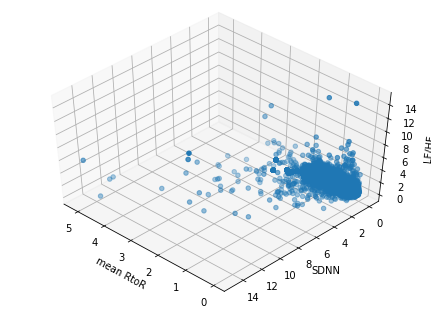

finishied!


In [9]:
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn.cluster import SpectralClustering
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read normalized data
my_data = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_10scut10smv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_10scut10smv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
# make data (userid, time(minute), mean, sdnn, ratioLFHF)
#print ('my data: {0}'.format(my_data[0,:]))
#print ('my data: {0}'.format(my_data_2[0,:]))
#print ('my data: {0}'.format(my_data_3[0,:]))
print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))

row_c = my_data.shape[0]
col_c = my_data.shape[1]
n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]

n_clusters = 3
spectral = SpectralClustering(
        n_clusters, eigen_solver='arpack',
        affinity="rbf")

spectral.fit(X[:][:])
labels_ = spectral.fit_predict(X[:][:])


filex = open("labels.txt","a+")
#filex.write('{0}'.format(y_pred))
for i in range(labels_.shape[0]):
     filex.write('{0},'.format(labels_[i]))
filex.close()

print('{0}'.format(n_clusters))
print('spectral labels:({0})\n{1}\n'.format(labels_.shape, labels_))
print('spectral affinity matrix:{0},{1}\n'.format(spectral.affinity_matrix_.shape[0],spectral.affinity_matrix_.shape[1]))      
print('spectral params:{0}\n'.format(spectral.get_params(True)))      
#print('spectral centers:{0}'.format(spectral.cluster_centers_))
#print('spectral intertia_:{0}'.format(spectral.inertia_))

#Draw Picture for the clustered data Set

#estimators = {'spectral_ECG_3': spectral}
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDNN')
ax.set_zlabel('LF/HF')

ax.scatter(xs, ys, zs, spectral.labels_, cmap='viridis')
#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(spectral.labels_.shape[0]):
      if(spectral.labels_[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*10 #10sec, for 2 minute it was c_minute=timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file0.close()
      if(spectral.labels_[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file1.close()
      if(spectral.labels_[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file2.close()
      if(spectral.labels_[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file3.close()
      if(spectral.labels_[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file4.close()
      if(spectral.labels_[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file5.close()
      if(spectral.labels_[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file6.close()
      if(spectral.labels_[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file7.close()
      if(spectral.labels_[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file8.close()
      if(spectral.labels_[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file9.close()
      if(spectral.labels_[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file10.close()    
print('finishied!')    

size my data:(22,437)
5
kmeans labels:((9614,))
[1 4 1 ..., 0 0 0]
kmeans centers:[[ 0.50889763  0.34591163  0.35115997]
 [ 1.65461687  1.60361657  0.84764971]
 [ 0.75232815  0.71993615  3.11930462]
 [ 0.95019114  0.71098435  0.90719128]
 [ 2.34501955  8.23966683  3.50500776]]
kmeans intertia_:4444.078601514794


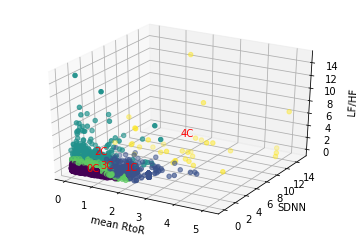

finishied!


In [5]:
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn.cluster import KMeans
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read normalized data
my_data = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_10scut10smv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_10scut10smv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
# make data (userid, time(minute), mean, sdnn, ratioLFHF)
#print ('my data: {0}'.format(my_data[0,:]))
#print ('my data: {0}'.format(my_data_2[0,:]))
#print ('my data: {0}'.format(my_data_3[0,:]))
print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]


n_clusters = 5
kmeans = KMeans(n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e4, 
                precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1).fit(X[:][:])

print('{0}'.format(n_clusters))
print('kmeans labels:({0})\n{1}'.format(kmeans.labels_.shape, kmeans.labels_))
print('kmeans centers:{0}'.format(kmeans.cluster_centers_))
print('kmeans intertia_:{0}'.format(kmeans.inertia_))

filex = open("labels.txt","a+")
#filex.write('{0}'.format(y_pred))
for i in range(kmeans.labels_.shape[0]):
     filex.write('{0},'.format(kmeans.labels_[i]))
filex.close()

#Draw Picture for the clustered data Set

#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDNN')
ax.set_zlabel('LF/HF')

color=["r", "g", "b", "m"]
#ax.scatter(xs, ys, zs, c=kmeans.labels_, cmap=color[kmeans.labels_])
#for i in kmeans.labels_:
#    ax.scatter(xs[i], ys[i], zs[i], c=kmeans.labels_[i], cmap=color[kmeans.labels_[i]])
ax.scatter(xs, ys, zs, c=kmeans.labels_, cmap='viridis')
#ax.scatter(kmeans.cluster_centers_[:][0], kmeans.cluster_centers_[:][1], kmeans.cluster_centers_[:][2], marker = "X", s=150, linewidths = 5, zorder = 100, c=color)

for c in range(n_clusters):
    buf = "%dC" % (c)
    ax.text(kmeans.cluster_centers_[c][0], kmeans.cluster_centers_[c][1], kmeans.cluster_centers_[c][2], buf, color=color[0])

#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(kmeans.labels_.shape[0]):
      if(kmeans.labels_[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*10 #10sec, for 2 minute it was c_minute=timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file0.close()
      if(kmeans.labels_[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file1.close()
      if(kmeans.labels_[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file2.close()
      if(kmeans.labels_[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file3.close()
      if(kmeans.labels_[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file4.close()
      if(kmeans.labels_[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file5.close()
      if(kmeans.labels_[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file6.close()
      if(kmeans.labels_[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file7.close()
      if(kmeans.labels_[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file8.close()
      if(kmeans.labels_[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file9.close()
      if(kmeans.labels_[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file10.close()    
print('finishied!')        

In [27]:
color=["r", "g", "b", "y"]
color[0]

'r'

In [4]:
int(79%60)

19

In [53]:
fig= plt.figure(figsize=(10,10))
plt.show()

size my data:(22,449)
4
gmm labels:((9878,))
[1 1 0 ..., 3 3 3]


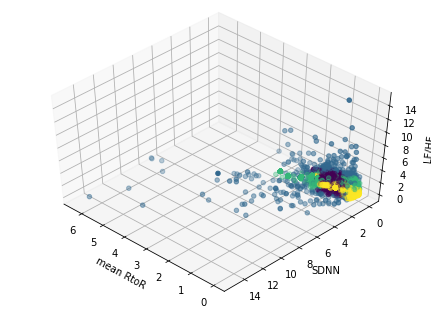

finishied!


In [4]:
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn import mixture
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read normalized data
my_data = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_10scut10smv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_10scut10smv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]


n_clusters = 4
gmm = mixture.GaussianMixture(n_clusters, covariance_type='full')

gmm.fit(X[:][:])
if hasattr(gmm, 'labels_'):
    y_pred = gmm.labels_.astype(np.int)
else:
    y_pred = gmm.predict(X)

print('{0}'.format(n_clusters))
print('gmm labels:({0})\n{1}'.format(y_pred.shape, y_pred))
filex = open("labels.txt","a+")
#filex.write('{0}'.format(y_pred))
for i in range(y_pred.shape[0]):
     filex.write('{0},'.format(y_pred[i]))
filex.close()

#Draw Picture for the clustered data Set

#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDNN')
ax.set_zlabel('LF/HF')

color=["r", "g", "b", "m"]
ax.scatter(xs, ys, zs, c=y_pred, cmap='viridis')

#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(y_pred.shape[0]):
      if(y_pred[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*10 #10sec, for 2 minute it was c_minute=timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file0.close()
      if(y_pred[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file1.close()
      if(y_pred[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file2.close()
      if(y_pred[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file3.close()
      if(y_pred[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file4.close()
      if(y_pred[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file5.close()
      if(y_pred[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file6.close()
      if(y_pred[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file7.close()
      if(y_pred[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file8.close()
      if(y_pred[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file9.close()
      if(y_pred[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file10.close()    
print('finishied!')    

In [4]:
from numpy import genfromtxt
import numpy as np

differentiate_tf_data = genfromtxt('./ECGdata/label_stuff.csv', delimiter=',')
print(differentiate_tf_data.shape[0], differentiate_tf_data.shape[1])
print(differentiate_tf_data[0,0], differentiate_tf_data[0,1])
get_total_labeling = genfromtxt('./labels_gmm4.txt',delimiter=',')
print(get_total_labeling.shape[0])
print(get_total_labeling)
new_label =  np.zeros(int(sum(differentiate_tf_data[:,0])))
print(int(sum(differentiate_tf_data[:,0])))

22 2
283.0 165.0
49394
[  1.   1.   0. ...,   1.   1.  nan]
7516


In [10]:
accumulate_v = 0;
accumulate_tv = 0;
for i in range(differentiate_tf_data.shape[0]):    
    #print(differentiate_tf_data[i,0])
    new_label[accumulate_v:accumulate_v+int(differentiate_tf_data[i,0])] = get_total_labeling[accumulate_tv:accumulate_tv+int(differentiate_tf_data[i,0])]
    accumulate_tv = accumulate_tv + int(differentiate_tf_data[i,0]+differentiate_tf_data[i,1]) 
    accumulate_v = accumulate_v + int(differentiate_tf_data[i,0])
    print('i:{0}, av:{1}, atv:{2}, cv:{3}'.format(i, accumulate_v, accumulate_tv,  int(differentiate_tf_data[i,0])))
filex = open("real_labels.txt","w")
#filex.write('{0}'.format(y_pred))
for i in range(new_label.shape[0]):
     filex.write('{0},'.format(int(new_label[i])))
filex.close()

i:0, av:283, atv:448, cv:283
i:1, av:642, atv:896, cv:359
i:2, av:886, atv:1344, cv:244
i:3, av:1135, atv:1792, cv:249
i:4, av:1552, atv:2240, cv:417
i:5, av:1743, atv:2688, cv:191
i:6, av:2191, atv:3136, cv:448
i:7, av:2557, atv:3584, cv:366
i:8, av:2991, atv:4032, cv:434
i:9, av:3302, atv:4480, cv:311
i:10, av:3596, atv:4928, cv:294
i:11, av:3957, atv:5376, cv:361
i:12, av:4320, atv:5824, cv:363
i:13, av:4665, atv:6272, cv:345
i:14, av:4957, atv:6720, cv:292
i:15, av:5341, atv:7168, cv:384
i:16, av:5746, atv:7616, cv:405
i:17, av:6101, atv:8064, cv:355
i:18, av:6532, atv:8512, cv:431
i:19, av:6958, atv:8960, cv:426
i:20, av:7341, atv:9408, cv:383
i:21, av:7516, atv:9856, cv:175


size my data:(22,449)
3
ward labels:((9878,))
[0 0 1 ..., 1 1 1]


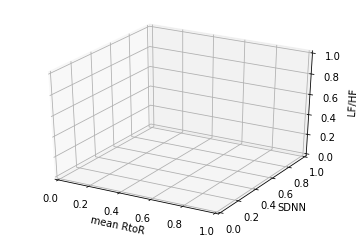

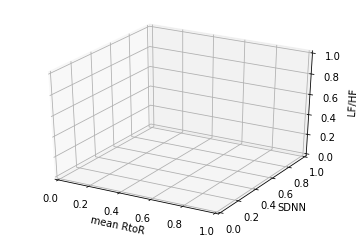

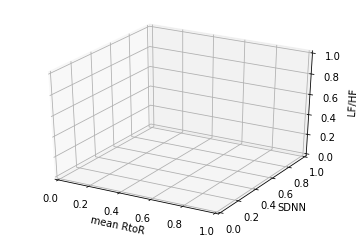

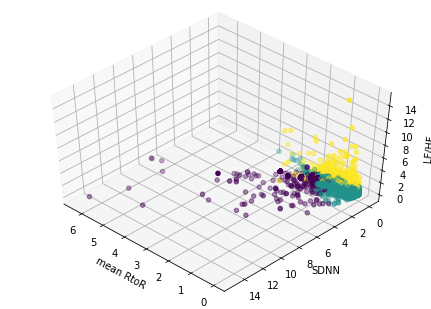

finishied!


In [33]:
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn import cluster
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

# read normalized data
my_data = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_10scut10smv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_10scut10smv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
# make data (userid, time(minute), mean, sdnn, ratioLFHF)
#print ('my data: {0}'.format(my_data[0,:]))
#print ('my data: {0}'.format(my_data_2[0,:]))
#print ('my data: {0}'.format(my_data_3[0,:]))
print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]


n_clusters = 3
n_neighbors = 10
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
        X, n_neighbors, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
    
ward = cluster.AgglomerativeClustering(
        n_clusters, linkage='ward',
        connectivity=connectivity)

ward.fit(X[:][:])

if hasattr(ward, 'labels_'):
    y_pred = ward.labels_.astype(np.int)
else:
    y_pred = ward.predict(X)

print('{0}'.format(n_clusters))
print('ward labels:({0})\n{1}'.format(y_pred.shape, y_pred))
filex = open("labels.txt","a+")
#filex.write('{0}'.format(y_pred))
for i in range(y_pred.shape[0]):
     filex.write('{0},'.format(y_pred[i]))
filex.close()
#Draw Picture for the clustered data Set

#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDNN')
ax.set_zlabel('LF/HF')

color=["r", "g", "b", "m"]
ax.scatter(xs, ys, zs, c=y_pred, cmap='viridis')

#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(y_pred.shape[0]):
      if(y_pred[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*10 #10sec, for 2 minute it was c_minute=timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file0.close()
      if(y_pred[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file1.close()
      if(y_pred[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file2.close()
      if(y_pred[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file3.close()
      if(y_pred[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file4.close()
      if(y_pred[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file5.close()
      if(y_pred[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file6.close()
      if(y_pred[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file7.close()
      if(y_pred[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file8.close()
      if(y_pred[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file9.close()
      if(y_pred[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file10.close()    
print('finishied!')

In [15]:
#image load and draw
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn import mixture
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read normalized data
my_data   = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_10scut10smv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_10scut10smv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
print ('size my data:({0},{1})'.format(my_data.shape[0], my_data.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0, row_c):
    for j in range(0, col_c):
        n_comp = i*col_c + j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]


n_clusters = 5
n_elements = 9878#9614
n_labels = 7516
#y_pred = genfromtxt('./LABELS/K-means 3 Cluster/labels.txt', delimiter=',')
#y_pred = genfromtxt('./labels.txt', delimiter=',')
#filename = './draw_labels.csv'
#filex = fileopen(filename, 'w')
y_pred = np.zeros(n_elements)
y_pred_tmp = genfromtxt('./hand_label.csv', delimiter=',')
label_stuff = genfromtxt('./label_stuff.csv', delimiter=',')

print('label stuff shape: {0}, {1}'.format(label_stuff.shape[0], label_stuff.shape[1]))
#print(label_stuff[0][0])
accum_j = 0
for i in range(label_stuff.shape[0]):
    for j in range(int(label_stuff[i][0])):
        y_pred[j] = y_pred_tmp[accum_j]
        accum_j += 1
    for k in range(int(label_stuff[i][1])):
        y_pred[accum_j + k] = '4'
    

print(y_pred)

size my data:(22,449)
label stuff shape: 22, 2
[ 0.  0.  1. ...,  0.  0.  0.]


5
 labels:((9878,))
[ 0.  0.  1. ...,  0.  0.  0.]


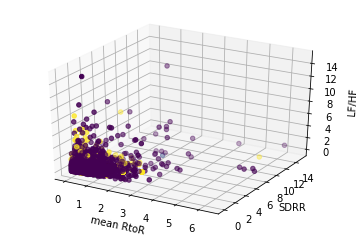

In [23]:
print('{0}'.format(n_clusters))
print(' labels:({0})\n{1}'.format(y_pred.shape, y_pred))
#filex = open("labels.txt","a+")
#for i in range(y_pred.shape[0]):
#     filex.write('{0},'.format(y_pred[i]))
#filex.close()

#Draw Picture for the clustered data Set

#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(112, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDRR')
ax.set_zlabel('LF/HF')

color=["r", "g", "b", "m"]
ax.scatter(xs, ys, zs, c=y_pred, cmap='viridis')

#plt.colorbar()
plt.show()

In [35]:
from numpy import genfromtxt
import numpy as mp

get_total_labeling = genfromtxt('./labels_gmm4.txt',delimiter=',')
my_data = genfromtxt('./total_user_ratioLFHF_10cuts10mvs_.csv', delimiter=',', skip_header = 1)

print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
print(my_data)
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n_dirver = 22
n_class = 4
driver_label = np.zeros((n_dirver, n_class))
filename = './data_fatigue_detect_basedOnratioLFHF.csv'
filex = open(filename, 'w')
for i in range(0,row_c):
    n_cnt_label = np.zeros(n_class)
    row_index = col_c * i
    
    for j in range(col_c-1):
        if(get_total_labeling[row_index + j] == 0):
            driver_label[i,0] += my_data[i, j]
            n_cnt_label[0] += 1
            #print('row_index+j:{0}, i:{1}, j:{2}, my_data:{3}'.format(row_index+j, i, j, my_data[i, j]))
        elif(get_total_labeling[row_index + j] == 1):
            driver_label[i,1] += my_data[i, j]
            n_cnt_label[1] += 1            
        elif(get_total_labeling[row_index + j] == 2):
            driver_label[i,2] += my_data[i, j]
            n_cnt_label[2] += 1            
        elif(get_total_labeling[row_index + j] == 3):
            driver_label[i,3] += my_data[i, j]
            n_cnt_label[3] += 1         
        else:
            print('label:{0}, data:{1}'.format(get_total_labeling[row_index + j], my_data[i, j]))
    for k in range(n_class):
        if(n_cnt_label[k] != 0):
            print('{0},{1}:{2},{3}'.format(i, k, driver_label[i,k], n_cnt_label[k]))
            driver_label[i,k] /= n_cnt_label[k];
        else:
            driver_label[i,k] = 0;
        filex.write('{0},{1},'.format(k, driver_label[i,k]))
    
    filex.write('\n')
filex.close()    
    
            

size my data:(22,449)
[[ 0.512518  0.422896  0.452406 ...,  0.        0.             nan]
 [ 0.335766  0.510947  0.148343 ...,  0.        0.             nan]
 [ 0.260829  0.655844  0.62589  ...,  0.        0.             nan]
 ..., 
 [ 0.833074  0.333023  0.277369 ...,  0.        0.             nan]
 [ 0.08288   0.381011  0.352372 ...,  0.        0.             nan]
 [ 0.199006  0.186089  1.271298 ...,  0.        0.             nan]]
0,0:57.41513900000002,274.0
0,1:6.323314,10.0
0,2:12.895753,21.0
0,3:32.35238899999998,143.0
1,0:35.467504999999996,90.0
1,1:11.591459,23.0
1,2:13.670216000000003,127.0
1,3:49.50620499999997,208.0
2,0:39.22292700000001,323.0
2,1:9.117753000000002,17.0
2,2:17.879066,36.0
2,3:14.566918000000005,72.0
3,0:28.86277399999999,297.0
3,1:15.050606,24.0
3,2:35.565152,63.0
3,3:13.334716000000004,64.0
4,0:1.209865,10.0
4,1:6.657861999999999,16.0
4,2:4.779723,105.0
4,3:10.763283000000005,317.0
5,0:4.324751,326.0
5,1:6.511306,18.0
5,2:8.174937999999997,55.0
5,3:1.862874

In [36]:
from numpy import genfromtxt
import numpy as mp

get_total_labeling = genfromtxt('./labels_gmm4.txt',delimiter=',')
my_data = genfromtxt('./total_user_meanPerM_10cuts10mvs_.csv', delimiter=',', skip_header = 1)

print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
print(my_data)
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n_dirver = 22
n_class = 4
driver_label = np.zeros((n_dirver, n_class))
filename = './data_fatigue_detect_basedOn_meanRtoR.csv'
filex = open(filename, 'w')
for i in range(0,row_c):
    n_cnt_label = np.zeros(n_class)
    row_index = col_c * i
    
    for j in range(col_c-1):
        if(get_total_labeling[row_index + j] == 0):
            driver_label[i,0] += my_data[i, j]
            n_cnt_label[0] += 1
            #print('row_index+j:{0}, i:{1}, j:{2}, my_data:{3}'.format(row_index+j, i, j, my_data[i, j]))
        elif(get_total_labeling[row_index + j] == 1):
            driver_label[i,1] += my_data[i, j]
            n_cnt_label[1] += 1            
        elif(get_total_labeling[row_index + j] == 2):
            driver_label[i,2] += my_data[i, j]
            n_cnt_label[2] += 1            
        elif(get_total_labeling[row_index + j] == 3):
            driver_label[i,3] += my_data[i, j]
            n_cnt_label[3] += 1         
        else:
            print('label:{0}, data:{1}'.format(get_total_labeling[row_index + j], my_data[i, j]))
    for k in range(n_class):
        if(n_cnt_label[k] != 0):
            print('{0},{1}:{2},{3}'.format(i, k, driver_label[i,k], n_cnt_label[k]))
            driver_label[i,k] /= n_cnt_label[k];
        else:
            driver_label[i,k] = 0;
        filex.write('{0},{1},'.format(k, driver_label[i,k]))
    
    filex.write('\n')
filex.close()    

size my data:(22,449)
[[ 167.545455  561.25      145.769231 ...,    0.          0.               nan]
 [ 120.352941  123.368421  122.7      ...,    0.          0.               nan]
 [ 156.166667  186.666667  186.538462 ...,    0.          0.               nan]
 ..., 
 [ 127.764706  199.583333  173.       ...,    0.          0.               nan]
 [ 136.066667  111.25      134.888889 ...,    0.          0.               nan]
 [ 146.916667  194.444444  103.625    ...,    0.          0.               nan]]
0,0:18628.117910999998,274.0
0,1:2251.976688,10.0
0,2:2679.351347,21.0
0,3:16965.995472000002,143.0
1,0:18470.098581,90.0
1,1:4738.621882,23.0
1,2:5170.556289000001,127.0
1,3:25302.621918000004,208.0
2,0:15937.323439999996,323.0
2,1:3237.8726279999996,17.0
2,2:5425.619952,36.0
2,3:7627.521414000002,72.0
3,0:12103.663429,297.0
3,1:4029.220584,24.0
3,2:10466.121308,63.0
3,3:7911.244152,64.0
4,0:1814.1434239999999,10.0
4,1:2583.701184,16.0
4,2:3647.5012549999997,105.0
4,3:62506.5714650000

In [37]:
from numpy import genfromtxt
import numpy as mp

get_total_labeling = genfromtxt('./labels_gmm4.txt',delimiter=',')
my_data = genfromtxt('./total_user_SDNNPerM_10cuts10mvs_.csv', delimiter=',', skip_header = 1)

print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
print(my_data)
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n_dirver = 22
n_class = 4
driver_label = np.zeros((n_dirver, n_class))
filename = './data_fatigue_detect_basedOnSDNN.csv'
filex = open(filename, 'w')
for i in range(0,row_c):
    n_cnt_label = np.zeros(n_class)
    row_index = col_c * i
    
    for j in range(col_c-1):
        if(get_total_labeling[row_index + j] == 0):
            driver_label[i,0] += my_data[i, j]
            n_cnt_label[0] += 1
            #print('row_index+j:{0}, i:{1}, j:{2}, my_data:{3}'.format(row_index+j, i, j, my_data[i, j]))
        elif(get_total_labeling[row_index + j] == 1):
            driver_label[i,1] += my_data[i, j]
            n_cnt_label[1] += 1            
        elif(get_total_labeling[row_index + j] == 2):
            driver_label[i,2] += my_data[i, j]
            n_cnt_label[2] += 1            
        elif(get_total_labeling[row_index + j] == 3):
            driver_label[i,3] += my_data[i, j]
            n_cnt_label[3] += 1         
        else:
            print('label:{0}, data:{1}'.format(get_total_labeling[row_index + j], my_data[i, j]))
    for k in range(n_class):
        if(n_cnt_label[k] != 0):
            print('{0},{1}:{2},{3}'.format(i, k, driver_label[i,k], n_cnt_label[k]))
            driver_label[i,k] /= n_cnt_label[k];
        else:
            driver_label[i,k] = 0;
        filex.write('{0},{1},'.format(k, driver_label[i,k]))
    
    filex.write('\n')
filex.close()    

size my data:(22,449)
[[ 204.382662  891.216911  120.108391 ...,    0.          0.               nan]
 [  93.560102   63.277353   66.081369 ...,    0.          0.               nan]
 [  85.418577   59.059805   56.904328 ...,    0.          0.               nan]
 ..., 
 [  77.578613   73.977218   78.873316 ...,    0.          0.               nan]
 [  73.565779   80.615315   91.585311 ...,    0.          0.               nan]
 [ 104.375597  152.373809   55.324852 ...,    0.          0.               nan]]
0,0:7418.244063000001,274.0
0,1:2293.454945,10.0
0,2:1387.265766,21.0
0,3:8272.435712000002,143.0
1,0:8324.3301,90.0
1,1:4843.280407,23.0
1,2:3023.7365659999996,127.0
1,3:14184.035884000006,208.0
2,0:6820.775905999999,323.0
2,1:2895.801,17.0
2,2:3082.853255000001,36.0
2,3:3886.894235999999,72.0
3,0:5233.433357000001,297.0
3,1:2297.904835,24.0
3,2:4785.821435000002,63.0
3,3:3738.2743840000003,64.0
4,0:777.240362,10.0
4,1:1828.060133,16.0
4,2:1724.808176,105.0
4,3:22410.59272099998,317.0

In [29]:
# compare two kinds of labels
# 1. hand-crafted, 2. clustered 
y_handcrafted = genfromtxt('./hand_label.csv', delimiter=',')
y_clustered = genfromtxt('./real_labels.txt', delimiter=',')

N = 7216
def Nomalized_ratio(value):
    return (value/N)*100


cnt_label = np.zeros(4)
cnt_diff_label = np.zeros(12)
# hand_crafted --> clustered
# 0: 0->1, 1: 0->2, 2: 0->3, 
# 3: 1->0, 4: 1->2, 5: 1->3,
# 6: 2->0, 7: 2->1, 8: 2->3
# 9: 3->0, 10: 3->1, 11: 3->2

print(y_handcrafted)
print(y_clustered)
print(len(y_handcrafted))

[  1.   0.   0. ...,   1.   1.  nan]
[  1.   1.   0. ...,   3.   1.  nan]
7517


In [33]:


hand_label = np.zeros(4)
cluster_label = np.zeros(4)
for i in range(len(y_handcrafted-1)):
    #hand craft statistics
    if(y_handcrafted[i]==0):
        hand_label[0] += 1
    elif(y_handcrafted[i]==1):
        hand_label[1] += 1
    elif(y_handcrafted[i]==2):
        hand_label[2] += 1
    elif(y_handcrafted[i]==3):
        hand_label[3] += 1
    #clustered statistics
    if(y_clustered[i]==0):
        cluster_label[0] += 1
    elif(y_clustered[i]==1):
        cluster_label[1] += 1
    elif(y_clustered[i]==2):
        cluster_label[2] += 1
    elif(y_clustered[i]==3):
        cluster_label[3] += 1        
        
    #comparison between two labels
    if(y_handcrafted[i] == y_clustered[i]):
        index = int(y_handcrafted[i])
        cnt_label[index] += 1
    else:
        if(y_handcrafted[i]==0 and y_clustered[i]==1):
            cnt_diff_label[0] += 1
        elif(y_handcrafted[i]==0 and y_clustered[i]==2):
            cnt_diff_label[1] += 1
        elif(y_handcrafted[i]==0 and y_clustered[i]==3):
            cnt_diff_label[2] += 1
        elif(y_handcrafted[i]==1 and y_clustered[i]==0):
            cnt_diff_label[3] += 1
        elif(y_handcrafted[i]==1 and y_clustered[i]==2):
            cnt_diff_label[4] += 1
        elif(y_handcrafted[i]==1 and y_clustered[i]==3):
            cnt_diff_label[5] += 1
        elif(y_handcrafted[i]==2 and y_clustered[i]==0):
            cnt_diff_label[6] += 1
        elif(y_handcrafted[i]==2 and y_clustered[i]==1):
            cnt_diff_label[7] += 1
        elif(y_handcrafted[i]==2 and y_clustered[i]==3):
            cnt_diff_label[8] += 1
        elif(y_handcrafted[i]==3 and y_clustered[i]==0):
            cnt_diff_label[9] += 1
        elif(y_handcrafted[i]==3 and y_clustered[i]==1):
            cnt_diff_label[10] += 1
        elif(y_handcrafted[i]==3 and y_clustered[i]==2):
            cnt_diff_label[11] += 1
        else:
            print('what do I miss?: hand:{0}, cluster:{1}'.format(y_handcrafted[i], y_clustered[i]))

print('hand-crafted label statistics')
print('0:{0}, 1:{1}, 2:{2}, 3:{3}'.format(hand_label[0], hand_label[1], hand_label[2], hand_label[3]))
print('clustered label statistics')
print('0:{0}, 1:{1}, 2:{2}, 3:{3}'.format(cluster_label[0], cluster_label[1], cluster_label[2], cluster_label[3]))

print('the same matching:')
print('0:0~{0}, 1:1~{1}, 2:2~{2}, 3:3~{3}'.format(Nomalized_ratio(cnt_label[0]), Nomalized_ratio(cnt_label[1]), Nomalized_ratio(cnt_label[2]), Nomalized_ratio(cnt_label[3])))
print('different matching')
print('{0}: 0->1, {1}: 0->2, {2}: 0->3'.format(Nomalized_ratio(cnt_diff_label[0]), Nomalized_ratio(cnt_diff_label[1]),Nomalized_ratio(cnt_diff_label[2])))
print('{0}: 1->0, {1}: 1->2, {2}: 1->3'.format(Nomalized_ratio(cnt_diff_label[3]), Nomalized_ratio(cnt_diff_label[4]),Nomalized_ratio(cnt_diff_label[5])))
print('{0}: 2->0, {1}: 2->1, {2}: 2->3'.format(Nomalized_ratio(cnt_diff_label[6]), Nomalized_ratio(cnt_diff_label[7]),Nomalized_ratio(cnt_diff_label[8])))
print('{0}: 3->0, {1}: 3->1, {2}: 3->2'.format(Nomalized_ratio(cnt_diff_label[9]), Nomalized_ratio(cnt_diff_label[10]),Nomalized_ratio(cnt_diff_label[11])))

what do I miss?: hand:nan, cluster:nan
hand-crafted label statistics
0:442.0, 1:1842.0, 2:1098.0, 3:4134.0
clustered label statistics
0:1640.0, 1:466.0, 2:1179.0, 3:4231.0
the same matching:
0:0~5.0304878048780495, 1:1~4.074279379157428, 2:2~6.568736141906874, 3:3~90.46563192904657
different matching
0.789911308203991: 0->1, 4.53159645232816: 0->2, 8.023835920177385: 0->3
13.761086474501107: 1->0, 10.684589800443458: 1->2, 48.05986696230599: 1->3
7.524944567627495: 2->0, 2.2034368070953434: 2->1, 29.351441241685144: 2->3
41.86529933481153: 3->0, 12.3059866962306: 3->1, 27.23115299334812: 3->2


In [ ]:
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn import mixture
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read normalized data
my_data = genfromtxt('./ECGdata/total_user_whitenedmeanPerM_10scut10smv.csv', delimiter=',')
my_data_2 = genfromtxt('./ECGdata/total_user_whitenedSDNNPerM_10scut10smv.csv', delimiter=',')
my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
print ('size my data:({0},{1})'.format(my_data.shape[0],my_data.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]


n_clusters = 4
gmm = mixture.GaussianMixture(n_clusters, covariance_type='full')

gmm.fit(X[:][:])
if hasattr(gmm, 'labels_'):
    y_pred = gmm.labels_.astype(np.int)
else:
    y_pred = gmm.predict(X)

print('{0}'.format(n_clusters))
print('gmm labels:({0})\n{1}'.format(y_pred.shape, y_pred))
filex = open("labels.txt","a+")
#filex.write('{0}'.format(y_pred))
for i in range(y_pred.shape[0]):
     filex.write('{0},'.format(y_pred[i]))
filex.close()

#Draw Picture for the clustered data Set

#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
zs = my_data_3

ax.set_xlabel('mean RtoR')
ax.set_ylabel('SDNN')
ax.set_zlabel('LF/HF')

color=["r", "g", "b", "m"]
ax.scatter(xs, ys, zs, c=y_pred, cmap='viridis')

#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(y_pred.shape[0]):
      if(y_pred[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*10 #10sec, for 2 minute it was c_minute=timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file0.close()
      if(y_pred[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file1.close()
      if(y_pred[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file2.close()
      if(y_pred[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file3.close()
      if(y_pred[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file4.close()
      if(y_pred[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file5.close()
      if(y_pred[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file6.close()
      if(y_pred[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file7.close()
      if(y_pred[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file8.close()
      if(y_pred[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file9.close()
      if(y_pred[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file10.close()    
print('finishied!')    

In [6]:
########20180104############
from numpy import genfromtxt
import numpy as np
# 0_A_FS.csv 
# 0/1/2/3 (/wrong gripping/awake/sleeping1/sleeping2)
# A/D   (Amplitude of R peak/ Duration of QRS)
# FS/WI (Filtered Signal/Window integrated signal)
wfilename1 = '0_A_FS.csv';
wfilename2 = '1_A_FS.csv';
wfilename3 = '2_A_FS.csv';
wfilename32 = '3_A_FS.csv';
wfilename4 = '0_D_FS.csv';
wfilename5 = '1_D_FS.csv';
wfilename6 = '2_D_FS.csv';
wfilename62 = '3_D_FS.csv';

n_user = 18
n_amplitude = 11
n_qrs_len = 21
n_new_vector = 11
n_new_vector_row = 2
filename_head='./ECG_Statistics/'
#wrong gripping amplitude statistics (Filtered Signal)
X_base = np.zeros((n_user,n_amplitude))
#awake amplitude statistics (Filtered Signal)
X_base1 = np.zeros((n_user,n_amplitude))
#sleeping1 amplitude staticstics (Filtered Signal)
X_base2 = np.zeros((n_user,n_amplitude))
#sleeping2 amplitude staticstics (Filtered Signal)
X_base3 = np.zeros((n_user,n_amplitude))
#wrong gripping duration statistics(Filtered Signal)
D_base = np.zeros((n_user,n_qrs_len))
#awake duration statistics (Filtered Signal)
D_base1 = np.zeros((n_user,n_qrs_len))
#sleeping1 duration staticstics (Filtered Signal)
D_base2 = np.zeros((n_user,n_qrs_len))
#sleeping2  duration staticstics (Filtered Signal)
D_base3 = np.zeros((n_user,n_qrs_len))
UD_base = np.zeros((n_user, n_new_vector))
UD_base1 = np.zeros((n_user, n_new_vector))
UD_base2 = np.zeros((n_user, n_new_vector))
UD_base3 = np.zeros((n_user, n_new_vector))
#wrong gripping duration statistics(Filtered Signal)
N_base = np.zeros((n_user, n_amplitude + n_qrs_len))
#awake duration statistics (Filtered Signal)
N_base1 = np.zeros((n_user, n_amplitude + n_qrs_len))
#sleeping1 duration staticstics (Filtered Signal)
N_base2 = np.zeros((n_user, n_amplitude + n_qrs_len))
#sleeping2  duration staticstics (Filtered Signal)
N_base3 = np.zeros((n_user, n_amplitude + n_qrs_len))

filename_head1 = './ECG_Statistics/RPeak'
filename_head2 = './ECG_Statistics/QRSLength'
filename_tail = 'user.csv'

def Normalize(X):
    S_X = sum(X)
    if(S_X!=0):
        N_X = [x /S_X for x in X]
    else:
        N_X = [x for x in X]
    return N_X

for i in range(1,19):
    filename = filename_head + str(i) + wfilename1
    X = genfromtxt(filename, dtype='str', delimiter=',')
    filename = filename_head + str(i) + wfilename2
    X1 = genfromtxt(filename, dtype='str', delimiter=',')
    filename = filename_head + str(i) + wfilename3
    X2 = genfromtxt(filename, dtype='str', delimiter=',')
    filename = filename_head + str(i) + wfilename32
    X3 = genfromtxt(filename, dtype='str', delimiter=',')
    for j in range(0,10):
        X_base[i-1,j]  = int(X_base[i-1,j])  + int(X[j])
        X_base1[i-1,j] = int(X_base1[i-1,j]) + int(X1[j])
        X_base2[i-1,j] = int(X_base2[i-1,j]) + int(X2[j])
        X_base3[i-1,j] = int(X_base3[i-1,j]) + int(X3[j])
    X_base[i-1,:] = Normalize(X_base[i-1,:])
    X_base1[i-1,:] = Normalize(X_base1[i-1,:])
    X_base2[i-1,:] = Normalize(X_base2[i-1,:])
    X_base3[i-1,:] = Normalize(X_base3[i-1,:])
    
    #print('---------R_Peak---------------------')
    #print('---------Filtered Signal-user-{0}-------------'.format(i))
    #print('{0}'.format(X_base[i-1,:]))
    #print('{0}'.format(X_base1[i-1,:]))
    #print('{0}'.format(X_base2[i-1,:]))
    #print('{0}'.format(X_base3[i-1,:]))
    
   
    filename = filename_head + str(i) + wfilename4
    D = genfromtxt(filename, dtype='str', delimiter=',')
    filename = filename_head + str(i) + wfilename5
    D1 = genfromtxt(filename, dtype='str', delimiter=',')
    filename = filename_head + str(i) + wfilename6
    D2 = genfromtxt(filename, dtype='str', delimiter=',')
    filename = filename_head + str(i) + wfilename62
    D3 = genfromtxt(filename, dtype='str', delimiter=',')
    for j in range(0, 21):
        D_base[i-1,j]   = int(D_base[i-1,j])   + int(D[j])
        D_base1[i-1,j]  = int(D_base1[i-1,j])  + int(D1[j])
        D_base2[i-1,j]  = int(D_base2[i-1,j])  + int(D2[j])
        D_base3[i-1,j]  = int(D_base3[i-1,j])  + int(D3[j])
    D_base[i-1,:]  = Normalize(D_base[i-1,:])
    D_base1[i-1,:] = Normalize(D_base1[i-1,:])
    D_base2[i-1,:] = Normalize(D_base2[i-1,:])
    D_base3[i-1,:] = Normalize(D_base3[i-1,:])
    #print('---------QRS_Duration---------------------')
    #print('---------Filtered Signal-user - {0}------------------'.format(i))
    #print('{0}'.format(D_base[i-1,:]))
    #print('{0}'.format(D_base1[i-1,:]))
    #print('{0}'.format(D_base2[i-1,:]))
    #print('{0}'.format(D_base3[i-1,:]))
    #for j in range(0, 20, 2):
    #    UD_base[i-1,int(j/2)]  = D_base[i-1,j]  + D_base[i-1,j+1]
    #    UD_base1[i-1,int(j/2)] = D_base1[i-1,j] + D_base1[i-1,j+1]
    #    UD_base2[i-1,int(j/2)] = D_base2[i-1,j] + D_base2[i-1,j+1]
    #    UD_base3[i-1,int(j/2)] = D_base3[i-1,j] + D_base3[i-1,j+1]
    #UD_base[i-1,int((j+2)/2)] = D_base[i-1,j+2]

    # vector를 두 종류를 단순 결합하는 것이 아닌, 
    # vector를 확장한 값을 하나의 vector로 삼아서 vector를 구성한다. 
    N_base[i-1,:] = np.hstack([X_base[i-1,:], D_base[i-1,:]])
    N_base1[i-1,:] = np.hstack([X_base1[i-1,:], D_base1[i-1,:]])
    N_base2[i-1,:] = np.hstack([X_base2[i-1,:], D_base2[i-1,:]])
    N_base3[i-1,:] = np.hstack([X_base3[i-1,:], D_base3[i-1,:]])
    #print(X_base.shape, D_base.shape)
    #print(N_base.shape)
    
    # X 와 D의 dimension 크기를 맞춰주기 위해서, 
    # D를 2배수로 addition하여서 dimension을 줄인다. 
    # 그리고 X는 마지막에 0 padd를 추가하여서 dimension size를 11로 조정한다.
    # 그리고, 두 vector를 add하여서, "X + D = N" 한 N vector 4종류를 이용하여서 Clustering에 이용한다!
    #N_base[i-1,:,0]  = X_base[i-1,:]  
    #N_base[i-1,:,1]  = UD_base[i-1,:]
    #N_base1[i-1,:,0] = X_base1[i-1,:]
    #N_base1[i-1,:,1] = UD_base1[i-1,:]
    #N_base2[i-1,:,0] = X_base2[i-1,:]
    #N_base2[i-1,:,1] = UD_base2[i-1,:]
    #N_base3[i-1,:,0] = X_base3[i-1,:]
    #N_base3[i-1,:,1] = UD_base3[i-1,:]
    
    #print('---------R-Peak, QRS_Duration---------------------')
    #print('---------Filtered Signal-user - {0}------------------'.format(i))
    #print('{0}'.format(N_base[i-1,:]))
    #print('{0}'.format(N_base1[i-1,:]))
    #print('{0}'.format(N_base2[i-1,:]))
    #print('{0}'.format(N_base3[i-1,:]))
print('finished!')    
print(X_base.shape, D_base.shape, N_base.shape)

finished!
(18, 11) (18, 21) (18, 32)


size my data:(18,32,t_size:576)
5
gmm labels:((576,))
[3 3 0 2 2 2 2 2 2 2 3 2 1 2 2 2 0 0 0 3 0 0 0 3 3 3 3 3 3 3 3 3 2 0 2 2 2
 2 2 2 2 2 3 2 1 2 2 2 0 0 0 0 3 0 3 0 0 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 2
 3 2 1 2 2 2 0 0 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 3 2 1 2 2
 2 0 0 0 0 3 0 3 3 3 0 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 3 2 1 2 2 0 0 3 3 0
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 2 2 2 2 2 2 3 2 1 0 0 0 3 3 0 0 0 0 0 3 3
 3 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 3 2 1 2 2 0 0 3 3 0 3 3 0 0 0 3 3 3 3 3
 3 3 0 2 2 2 2 2 2 2 2 2 3 2 1 2 2 0 0 3 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 3 0
 2 2 2 2 2 2 2 3 2 1 2 2 2 0 0 3 3 0 2 0 3 3 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2
 2 2 3 2 1 2 2 0 0 0 3 0 2 0 0 3 3 3 3 3 3 0 3 3 0 2 2 2 2 2 2 2 2 2 3 2 1
 2 2 2 0 0 3 0 0 0 3 3 0 3 3 3 3 3 3 0 3 3 0 2 2 2 2 2 2 2 3 2 1 0 2 2 3 3
 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 3 2 1 0 0 0 3 3 3 3 0 0 0
 0 3 3 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 3 2 1 2 2 0 0 0 0 3 3 3 0 0 0 3 3 3
 3 3 3 3 0 2 2 2 2 2 2 2 2 2 3 2 1 2 2 2 2 0 0

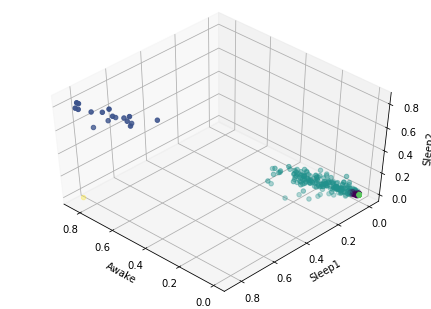

In [29]:
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn import mixture
#from sklearn import preprocessing
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read normalized data
my_data   = N_base  #Wrong Gripping
my_data_1 = N_base1 #Awake
my_data_2 = N_base2 #Sleep1 
my_data_3 = N_base3 #Sleep2
print ('size my data:({0},{1},t_size:{2})'.format(my_data.shape[0],my_data.shape[1],my_data.shape[0]*my_data.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]

n = 3
size_X = (row_c) * (col_c)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c):
        n_comp = i*col_c+j
        X[n_comp][0] = my_data_1[i,j]
        X[n_comp][1] = my_data_2[i,j]
        X[n_comp][2] = my_data_3[i,j]



n_clusters = 5
gmm = mixture.GaussianMixture(n_clusters, covariance_type='full')

gmm.fit(X[:][:])
if hasattr(gmm, 'labels_'):
    y_pred = gmm.labels_.astype(np.int)
else:
    y_pred = gmm.predict(X)

print('{0}'.format(n_clusters))
print('gmm labels:({0})\n{1}'.format(y_pred.shape, y_pred))
filex = open("labels.txt","a+")
#filex.write('{0}'.format(y_pred))
for i in range(y_pred.shape[0]):
     filex.write('{0},'.format(y_pred[i]))
filex.close()

filex = open("m_cluster3.txt", "a+")
# statistics of membership per user 18 according to the label definition
n_user = 18
S = np.zeros((n_user, n_clusters))
M = np.zeros(n_user)
n_element = col_c
print('groups')
for i in range(n_user):
    n_pos = int(i * n_element)
    for j in range(n_element):
        V = y_pred[n_pos+j]
        if(V==0): #
            S[i,0] = S[i,0] + 1
        elif(V==1): #
            S[i,1] = S[i,1] + 1
        elif(V==2): #
            S[i,2] = S[i,2] + 1
        elif(V==3): #
            S[i,3] = S[i,3] + 1
        elif(V==4):
            S[i,4] = S[i,4] + 1
        elif(V==5):
            S[i,5] = S[i,5] + 1
        elif(V==6):
            S[i,6] = S[i,6] + 1
    M[i] = max(S[i,:])         
    m_index = 0
    for j in range(n_clusters):
        if(M[i]==S[i,j]):
            m_index = j
            break;
    #print('user {0}, 0: {1}, 1:{2}, 2:{3}, 3:{4}, 4:{5}, 5:{6}, 6:{7}, M:{8}, C:{9}'.format(i, S[i,0], S[i,1], S[i,2], S[i,3], S[i,4], S[i,5], S[i,6], M[i], m_index))
    #print('user {0}, 0: {1}, 1:{2}, 2:{3}, 3:{4}, 4:{5}, 5:{6},  M:{7}, C:{8}'.format(i, S[i,0], S[i,1], S[i,2], S[i,3], S[i,4], S[i,5],  M[i], m_index))
    print('user {0}, 0: {1}, 1:{2}, 2:{3}, 3:{4}, 4:{5}, M:{6}, C:{7}'.format(i, S[i,0], S[i,1], S[i,2], S[i,3], S[i,4], M[i], m_index))
    #print('user {0}, 0: {1}, 1:{2}, 2:{3}, M:{4}, C:{5}'.format(i, S[i,0], S[i,1], S[i,2],M[i], m_index))
    filex.write('user {0},C:{1}\n'.format(i, m_index))
#Draw Picture for the clustered data Set
filex.close()
#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data_1
ys = my_data_2
zs = my_data_3

ax.set_xlabel('Awake')
ax.set_ylabel('Sleep1')
ax.set_zlabel('Sleep2')

color=["r", "g", "b","m", "c", "y", "k"]
ax.scatter(xs, ys, zs, c=y_pred, cmap='viridis')

#plt.colorbar()
plt.show()

In [12]:
X = [k for k in range(10)]
print(X)
max(X)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


9

In [21]:
a = [ k for k in range(10)]
print(len(a))

10


size my data:(54,20)
size my data2 :(54,20)
n_training:44, n_testing:10
3
kmeans labels:((1080,))
[0 0 0 ..., 0 0 0]
kmeans centers:[[ 0.0454973   0.01564026]
 [ 0.06653026  0.45008161]
 [ 0.07027768  0.17416675]]
kmeans intertia_:2.5170574626056403


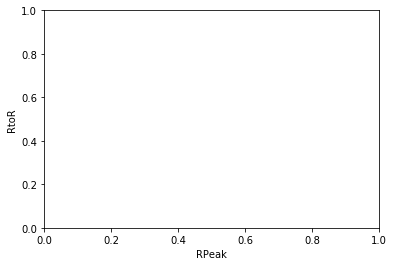

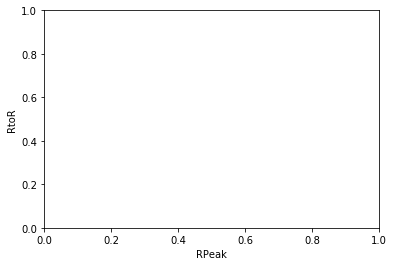

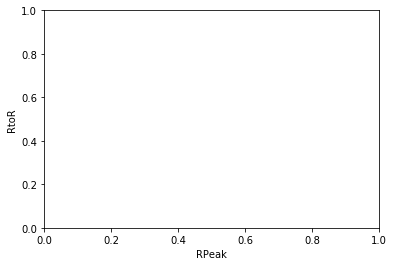

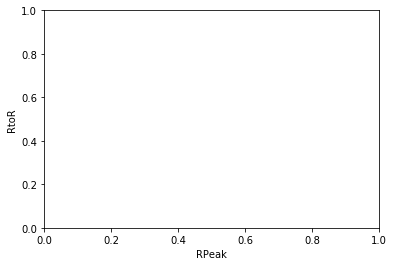

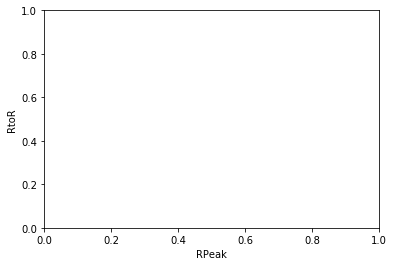

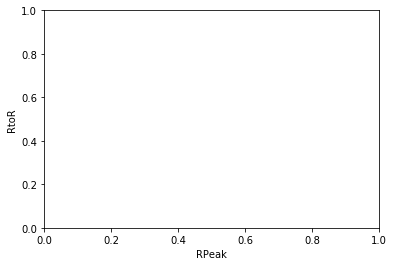

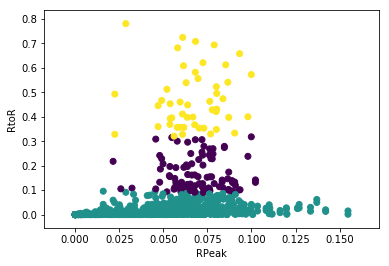

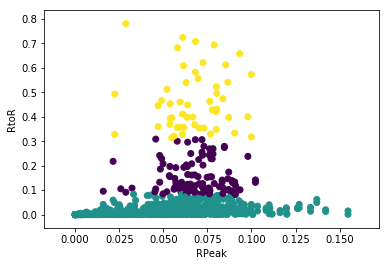

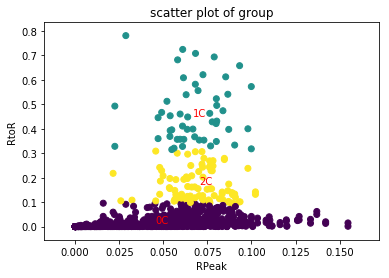

finishied!


In [26]:
#2018-02-23 Clustering from RPeak and RtoR length
from numpy import genfromtxt
import numpy as np
import decimal as dcm
from sklearn.cluster import KMeans
import math
import pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# read normalized data
my_data = genfromtxt('./ECG_Statistics5/RPeak.csv', delimiter=',')
my_data_2 = genfromtxt('./ECG_Statistics5/RtoR.csv', delimiter=',')
#my_data_3 = genfromtxt('./ECGdata/total_user_whitenedratioLFHF_10scut10smv.csv', delimiter=',')
# make data (userid, time(minute), mean, sdnn, ratioLFHF)
#print ('my data: {0}'.format(my_data[0,:]))
#print ('my data: {0}'.format(my_data_2[0,:]))
#print ('my data: {0}'.format(my_data_3[0,:]))
print ('size my data:({0},{1})'.format(my_data.shape[0], my_data.shape[1]))
print ('size my data2 :({0},{1})'.format(my_data_2.shape[0], my_data_2.shape[1]))
row_c = my_data.shape[0]
col_c = my_data.shape[1]
row_c2 = my_data_2.shape[0]
col_c2 = my_data_2.shape[1]

n_training = math.ceil(row_c*0.8)
n_testing = row_c - n_training 
print('n_training:{0}, n_testing:{1}'.format(n_training, n_testing))

n = 2
size_X = (row_c) * (col_c2)
X = [[ 0 for k in range(n)] for j in range(size_X)] 
for i in range(0,row_c):
    for j in range(0, col_c2):
        n_comp = i*col_c2 + j
        if(j<col_c):
            X[n_comp][0] = my_data[i,j]
        else:
            X[n_comp][0] = 0
        X[n_comp][1] = my_data_2[i,j]
        #X[n_comp][2] = my_data_3[i,j]
#print('X : {0}'.format(X))

size_X = (n_training)*(col_c2)
X_train = [[0 for k in range(n)] for j in range(size_X)]
for i in range(0, n_training):
    for j in range(0, col_c2):
        n_comp = i*col_c2 + j
        if(j<col_c):
            X_train[n_comp][0] = my_data[i,j]
        else:
            X_train[n_comp][0] = 0
        X_train[n_comp][1] = my_data_2[i,j]
        
size_X = (n_testing)*(col_c2)        
X_test = [[0 for k in range(n)] for j in range(size_X)]        
for i in range(0, row_c-n_training):
    for j in range(0, col_c2):
        n_comp = i*col_c2 + j
        if(j<col_c):
            #print('n_comp,i,j:{0},{1},{2}'.format(n_comp,i, j))
            X_test[n_comp][0] = my_data[i+n_training, j]
        else:
            X_test[n_comp][0] = 0
        X_test[n_comp][1] = my_data_2[i+n_training, j]

n_clusters = 3
kmeans = KMeans(n_clusters, init='k-means++', n_init=10, max_iter=300, tol=1e4, 
                precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1).fit(X[:][:])

print('{0}'.format(n_clusters))
print('kmeans labels:({0})\n{1}'.format(kmeans.labels_.shape, kmeans.labels_))
print('kmeans centers:{0}'.format(kmeans.cluster_centers_))
print('kmeans intertia_:{0}'.format(kmeans.inertia_))

#print('n_testing: {0}'.format(X_test))
#print('predict:{1}'.format(kmeans.predict(X_test)))

filex = open("labels.txt","w")
#filex.write('{0}'.format(y_pred))
for i in range(kmeans.labels_.shape[0]):
     filex.write('{0},'.format(kmeans.labels_[i]))
filex.close()

#Draw Picture for the clustered data Set

#estimators = {'k_means_ECG_3': kmeans}
fig = plt.figure()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, projection='3d')

#n = 9198
xs = my_data
ys = my_data_2
#zs = my_data_3

ax.set_xlabel('RPeak')
ax.set_ylabel('RtoR')
#ax.set_zlabel('LF/HF')

colors=("r", "g", "b") #, "m"
groups = ("G1", "G2", "G3")
#ax.scatter(xs, ys, zs, c=kmeans.labels_, cmap=color[kmeans.labels_])
#for i in kmeans.labels_:
#    ax.scatter(xs[i], ys[i], zs[i], c=kmeans.labels_[i], cmap=color[kmeans.labels_[i]])
data = (kmeans.labels_[1], kmeans.labels_[2], kmeans.labels_[3])
#print(data)
#for data, color, group in zip(data, colors, groups):
#    x, y = data
#    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)0

#for i in kmeans.labels_:
ax.scatter(xs, ys, c=kmeans.labels_, cmap='viridis')
#ax.scatter(kmeans.cluster_centers_[:][0], kmeans.cluster_centers_[:][1], kmeans.cluster_centers_[:][2], marker = "X", s=150, linewidths = 5, zorder = 100, c=color)

for c in range(n_clusters):
    buf = "%dC" % (c)
    ax.text(kmeans.cluster_centers_[c][0], kmeans.cluster_centers_[c][1], buf, color=color[0])

plt.title('scatter plot of group')
#plt.colorbar()
plt.show()

#Get the user and time position per label
for i in range(kmeans.labels_.shape[0]):
      if(kmeans.labels_[i]==0):
         timeinfo = i%col_c
         c_minute = timeinfo*10 #10sec, for 2 minute it was c_minute=timeinfo*2
         userinfo = int(i/col_c)
         file0 = open("0cluster.txt","a+")
         file0.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file0.close()
      if(kmeans.labels_[i]==1):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file1 = open("1cluster.txt","a+")
         file1.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file1.close()
      if(kmeans.labels_[i]==2):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file2 = open("2cluster.txt","a+")
         file2.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file2.close()
      if(kmeans.labels_[i]==3):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file3 = open("3cluster.txt","a+")
         file3.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file3.close()
      if(kmeans.labels_[i]==4):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file4 = open("4cluster.txt","a+")
         file4.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file4.close()
      if(kmeans.labels_[i]==5):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file5 = open("5cluster.txt","a+")
         file5.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file5.close()
      if(kmeans.labels_[i]==6):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file6 = open("6cluster.txt","a+")
         file6.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file6.close()
      if(kmeans.labels_[i]==7):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file7 = open("7cluster.txt","a+")
         file7.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file7.close()
      if(kmeans.labels_[i]==8):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file8 = open("8cluster.txt","a+")
         file8.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file8.close()
      if(kmeans.labels_[i]==9):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file9 = open("9cluster.txt","a+")
         file9.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file9.close()
      if(kmeans.labels_[i]==10):
         timeinfo = i%col_c
         c_minute = timeinfo*10
         userinfo = int(i/col_c)
         file10 = open("10cluster.txt","a+")
         file10.write('{0}u, {1}:{2}\n'.format(userinfo, int(c_minute/60), int(c_minute%60)))
         file10.close()    
print('finishied!')        